## Coronavirous Data Scrapping

In [1]:
#importing liabraries
from bs4 import BeautifulSoup
import requests

In [2]:
url = 'https://www.worldometers.info/coronavirus/countries-where-coronavirus-has-spread/' #url site to be scrapped
response = requests.get(url) #getting response 
print(response)

<Response [200]>


In [3]:
soup = BeautifulSoup(response.text,'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Countries where Coronavirus has spread - Worldometer
  </title>
  <meta content="Where is Coronavirus in the world? List of countries with confirmed cases and deaths (total cumulative number) due to the novel coronavirus COVID-19" name="description"/>
  <!-- Favicon -->
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
  <link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
  <link href="/favicon/apple-icon-76x76

In [4]:
p = soup.find_all('td')
p

[<td style="font-weight: bold; font-size:16px; text-align:left; padding-left:5px; padding-top:10px; padding-bottom:10px">United States</td>,
 <td style="font-weight: bold; text-align:right">111,820,082</td>,
 <td style="font-weight: bold; text-align:right">1,219,487</td>,
 <td style="font-size:14px; color:#aaa; text-align:right">North America</td>,
 <td style="font-weight: bold; font-size:16px; text-align:left; padding-left:5px; padding-top:10px; padding-bottom:10px">India</td>,
 <td style="font-weight: bold; text-align:right">45,035,393</td>,
 <td style="font-weight: bold; text-align:right">533,570</td>,
 <td style="font-size:14px; color:#aaa; text-align:right">Asia</td>,
 <td style="font-weight: bold; font-size:16px; text-align:left; padding-left:5px; padding-top:10px; padding-bottom:10px">France</td>,
 <td style="font-weight: bold; text-align:right">40,138,560</td>,
 <td style="font-weight: bold; text-align:right">167,642</td>,
 <td style="font-size:14px; color:#aaa; text-align:righ

In [5]:
s1 = soup.select('td')[0].text
s2 = soup.select('td')[1].text
s3 = soup.select('td')[2].text
s4 = soup.select('td')[3].text
s5 = soup.select('td')[4].text
s6 = soup.select('td')[5].text
s7 = soup.select('td')[6].text
s8 = soup.select('td')[7].text
s1,s2,s3,s4,s5,s6,s7,s8

('United States',
 '111,820,082',
 '1,219,487',
 'North America',
 'India',
 '45,035,393',
 '533,570',
 'Asia')

In [6]:
data = []
#for i in range (0,len(data_iterator),4):
for i in range(0,len(soup.find_all('td')),4):
    country = soup.select('td')[i].text
    cases = soup.select('td')[i+1].text
    deaths = soup.select('td')[i+2].text
    region = soup.select('td')[i+3].text
    data.append((
        country, 
                int(cases.replace(',','')),
                 int(deaths.replace(',','')),
                     region
               ))

In [7]:
import pandas as pd

In [8]:
df = pd.DataFrame(data,columns = ['country','cases','deaths','region'])
df

,country,cases,deaths,region
0,United States,111820082,1219487,North America
1,India,45035393,533570,Asia
2,France,40138560,167642,Europe
3,Germany,38828995,183027,Europe
4,Brazil,38743918,711380,South America
...,...,...,...,...
225,Niue,1059,0,Australia/Oceania
226,Tokelau,80,0,Australia/Oceania
227,Holy See,29,0,Europe
228,Western Sahara,10,1,Africa


In [9]:
df.dtypes

country    object
cases       int64
deaths      int64
region     object
dtype: object

In [10]:
df.isnull().sum()

country    0
cases      0
deaths     0
region     0
dtype: int64

# Countries in the world by population (2024) data scrapping


In [11]:
pop_url = 'https://www.worldometers.info/world-population/population-by-country/'
pop_response = requests.get(pop_url)
print(pop_response)

<Response [200]>


In [12]:
pop_soup = BeautifulSoup(pop_response.text, 'html.parser')
print(pop_soup.prettify())

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Population by Country (2024) - Worldometer
  </title>
  <meta content="List of countries and dependencies in the world ranked by population, from the most populated. Growth rate, median age, fertility rate, area, density, population density, urbanization, urban population, share of world population." name="description"/>
  <!-- Favicon -->
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
  <link href="/favicon/apple-icon-72x72.png" rel="ap

In [13]:
pop_td = pop_soup.find_all('td')
print(len(pop_td))
print(pop_td)

2808
[<td>1</td>, <td style="font-weight: bold; font-size:15px; text-align:left"><a href="/world-population/india-population/">India</a></td>, <td style="font-weight: bold;">1,450,935,791</td>, <td>0.89 %</td>, <td>12,866,195</td>, <td>488</td>, <td>2,973,190</td>, <td>-630,830</td>, <td>2.0</td>, <td>28</td>, <td>37 %</td>, <td>17.78 %</td>, <td>2</td>, <td style="font-weight: bold; font-size:15px; text-align:left"><a href="/world-population/china-population/">China</a></td>, <td style="font-weight: bold;">1,419,321,278</td>, <td>-0.23 %</td>, <td>-3,263,655</td>, <td>151</td>, <td>9,388,211</td>, <td>-318,992</td>, <td>1.0</td>, <td>40</td>, <td>66 %</td>, <td>17.39 %</td>, <td>3</td>, <td style="font-weight: bold; font-size:15px; text-align:left"><a href="/world-population/us-population/">United States</a></td>, <td style="font-weight: bold;">345,426,571</td>, <td>0.57 %</td>, <td>1,949,236</td>, <td>38</td>, <td>9,147,420</td>, <td>1,286,132</td>, <td>1.6</td>, <td>38</td>, <td>82 

In [14]:
pop1 = pop_soup.select('td')[0].text
pop2 = pop_soup.select('td')[1].text
pop3 = pop_soup.select('td')[2].text
pop4 = pop_soup.select('td')[3].text
pop5 = pop_soup.select('td')[4].text
pop6 = pop_soup.select('td')[5].text
pop7 = pop_soup.select('td')[6].text
pop8 = pop_soup.select('td')[7].text
pop9 = pop_soup.select('td')[8].text
pop10 = pop_soup.select('td')[9].text
pop11 = pop_soup.select('td')[10].text
pop12 = pop_soup.select('td')[11].text

pop13 = pop_soup.select('td')[12].text
pop14 = pop_soup.select('td')[13].text
pop15 = pop_soup.select('td')[14].text
pop16 = pop_soup.select('td')[15].text
pop17 = pop_soup.select('td')[16].text
pop18 = pop_soup.select('td')[17].text
pop19 = pop_soup.select('td')[18].text
pop20 = pop_soup.select('td')[19].text
pop21 = pop_soup.select('td')[20].text
pop22 = pop_soup.select('td')[21].text
pop23 = pop_soup.select('td')[22].text
pop24 = pop_soup.select('td')[23].text

print(pop1,'-',pop2,'-',pop3,'-',pop4,'-',pop5,'-',pop6,'-',pop7,'-',pop8,'-',pop9,'-',pop10,'-',pop11,'-',pop12)
print(pop13,'-',pop14,'-',pop15,'-',pop16,'-',pop17,'-',pop18,'-',pop19,'-',pop20,'-',pop21,'-',pop22,'-',pop23,'-',pop24)

1 - India - 1,450,935,791 - 0.89 % - 12,866,195 - 488 - 2,973,190 - -630,830 - 2.0 - 28 - 37 % - 17.78 %
2 - China - 1,419,321,278 - -0.23 % - -3,263,655 - 151 - 9,388,211 - -318,992 - 1.0 - 40 - 66 % - 17.39 %


In [15]:
data = []
for i in range(0,len(pop_soup.find_all('td')),12):
    sr = pop_soup.select('td')[i].text
    country = pop_soup.select('td')[i+1].text
    population = pop_soup.select('td')[i+2].text
    year_change = pop_soup.select('td')[i+3].text
    net_change = pop_soup.select('td')[i+4].text
    density = pop_soup.select('td')[i+5].text
    land_area = pop_soup.select('td')[i+6].text
    migrats = pop_soup.select('td')[i+7].text
    fert_rate = pop_soup.select('td')[i+8].text
    med_age = pop_soup.select('td')[i+9].text
    urban_pop = pop_soup.select('td')[i+10].text
    world_shar = pop_soup.select('td')[i+11].text

    data.append((
        country,
        int(population.replace(',','')),
        float(year_change.replace('%','')),
        int(net_change.replace(',','')),
        int(density.replace(',','')),
        int(land_area.replace(',','')),
        int(migrats.replace(',','')),
        float(fert_rate),
        int(med_age),
        urban_pop.replace('%',''),
        float(world_shar.replace('%',''))
    ))
    

In [16]:
print(data,end=' ')

[('India', 1450935791, 0.89, 12866195, 488, 2973190, -630830, 2.0, 28, '37 ', 17.78), ('China', 1419321278, -0.23, -3263655, 151, 9388211, -318992, 1.0, 40, '66 ', 17.39), ('United States', 345426571, 0.57, 1949236, 38, 9147420, 1286132, 1.6, 38, '82 ', 4.23), ('Indonesia', 283487931, 0.82, 2297864, 156, 1811570, -38469, 2.1, 30, '59 ', 3.47), ('Pakistan', 251269164, 1.52, 3764669, 326, 770880, -1401173, 3.5, 20, '34 ', 3.08), ('Nigeria', 232679478, 2.1, 4796533, 255, 910770, -35202, 4.4, 18, '54 ', 2.85), ('Brazil', 211998573, 0.41, 857844, 25, 8358140, -225510, 1.6, 34, '91 ', 2.6), ('Bangladesh', 173562364, 1.22, 2095374, 1333, 130170, -473362, 2.1, 26, '42 ', 2.13), ('Russia', 144820423, -0.43, -620077, 9, 16376870, -178042, 1.5, 40, '75 ', 1.77), ('Ethiopia', 132059767, 2.62, 3368075, 132, 1000000, 30069, 3.9, 19, '22 ', 1.62), ('Mexico', 130861007, 0.86, 1121248, 67, 1943950, -104581, 1.9, 29, '87 ', 1.6), ('Japan', 123753041, -0.5, -617906, 339, 364555, 153357, 1.2, 49, '93 ', 1

In [17]:
df1 = pd.DataFrame(data, columns=['country','population_2024','%year_change','net_change','density_p/km','land_area_km2',
                                'migrats_net','fert_rate','med_age','%urban_pop','%world_share'])
df1

,country,population_2024,%year_change,net_change,density_p/km,land_area_km2,migrats_net,fert_rate,med_age,%urban_pop,%world_share
0,India,1450935791,0.89,12866195,488,2973190,-630830,2.0,28,37,17.78
1,China,1419321278,-0.23,-3263655,151,9388211,-318992,1.0,40,66,17.39
2,United States,345426571,0.57,1949236,38,9147420,1286132,1.6,38,82,4.23
3,Indonesia,283487931,0.82,2297864,156,1811570,-38469,2.1,30,59,3.47
4,Pakistan,251269164,1.52,3764669,326,770880,-1401173,3.5,20,34,3.08
...,...,...,...,...,...,...,...,...,...,...,...
229,Montserrat,4389,-0.70,-31,44,100,-7,1.4,42,11,0.00
230,Falkland Islands,3470,-0.20,-7,0,12170,-13,1.7,42,68,0.00
231,Tokelau,2506,4.55,109,251,10,72,2.6,27,0,0.00
232,Niue,1819,0.11,2,7,260,10,2.5,36,44,0.00


In [18]:
print(type(df1))

<class 'pandas.core.frame.DataFrame'>


In [19]:
df1.dtypes

country             object
population_2024      int64
%year_change       float64
net_change           int64
density_p/km         int64
land_area_km2        int64
migrats_net          int64
fert_rate          float64
med_age              int64
%urban_pop          object
%world_share       float64
dtype: object

In [20]:
df1.isnull().sum()

country            0
population_2024    0
%year_change       0
net_change         0
density_p/km       0
land_area_km2      0
migrats_net        0
fert_rate          0
med_age            0
%urban_pop         0
%world_share       0
dtype: int64

In [21]:
df1['%urban_pop'].values

array(['37 ', '66 ', '82 ', '59 ', '34 ', '54 ', '91 ', '42 ', '75 ',
       '22 ', '87 ', '93 ', '41 ', '49 ', '44 ', '41 ', '73 ', '76 ',
       '76 ', '53 ', '84 ', '39 ', '82 ', '66 ', '72 ', '31 ', '34 ',
       '81 ', '82 ', '35 ', '29 ', '79 ', '74 ', '72 ', '95 ', '27 ',
       '33 ', '80 ', '59 ', '67 ', '68 ', '79 ', '48 ', '77 ', '41 ',
       '58 ', '80 ', '92 ', '40 ', '49 ', '24 ', '59 ', 'N.A.', '18 ',
       '86 ', '63 ', '53 ', '44 ', '33 ', '83 ', '18 ', '19 ', '46 ',
       '55 ', '22 ', '85 ', '55 ', '46 ', '52 ', '56 ', '89 ', '65 ',
       '26 ', '38 ', '40 ', '47 ', '18 ', '14 ', '70 ', '71 ', '27 ',
       '61 ', '99 ', '84 ', '86 ', '82 ', '81 ', '58 ', '74 ', '87 ',
       '27 ', '12 ', '66 ', '58 ', '88 ', '72 ', '44 ', '91 ', '58 ',
       '84 ', '74 ', '45 ', '38 ', '46 ', 'N.A.', '77 ', '35 ', '68 ',
       '58 ', '77 ', '73 ', '79 ', '69 ', '87 ', 'N.A.', '88 ', '86 ',
       '54 ', '86 ', '54 ', '83 ', '44 ', '93 ', '62 ', '83 ', '60 ',
       '84 ', '92

In [22]:
df1['%urban_pop'] = df1['%urban_pop'].replace('N.A.',0)
df1['%urban_pop'] = pd.to_numeric(df1['%urban_pop'])
df1.dtypes

country             object
population_2024      int64
%year_change       float64
net_change           int64
density_p/km         int64
land_area_km2        int64
migrats_net          int64
fert_rate          float64
med_age              int64
%urban_pop           int64
%world_share       float64
dtype: object

In [23]:
df1.head() 

,country,population_2024,%year_change,net_change,density_p/km,land_area_km2,migrats_net,fert_rate,med_age,%urban_pop,%world_share
0,India,1450935791,0.89,12866195,488,2973190,-630830,2.0,28,37,17.78
1,China,1419321278,-0.23,-3263655,151,9388211,-318992,1.0,40,66,17.39
2,United States,345426571,0.57,1949236,38,9147420,1286132,1.6,38,82,4.23
3,Indonesia,283487931,0.82,2297864,156,1811570,-38469,2.1,30,59,3.47
4,Pakistan,251269164,1.52,3764669,326,770880,-1401173,3.5,20,34,3.08


In [24]:
df.head()

,country,cases,deaths,region
0,United States,111820082,1219487,North America
1,India,45035393,533570,Asia
2,France,40138560,167642,Europe
3,Germany,38828995,183027,Europe
4,Brazil,38743918,711380,South America


In [25]:
data = pd.merge(df,df1, on='country',how = 'left')
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [26]:
data.isnull().sum()

country            0
cases              0
deaths             0
region             0
population_2024    3
%year_change       3
net_change         3
density_p/km       3
land_area_km2      3
migrats_net        3
fert_rate          3
med_age            3
%urban_pop         3
%world_share       3
dtype: int64

In [27]:
data

,country,cases,deaths,region,population_2024,%year_change,net_change,density_p/km,land_area_km2,migrats_net,fert_rate,med_age,%urban_pop,%world_share
0,United States,111820082,1219487,North America,3.454266e+08,0.57,1949236.0,38.0,9147420.0,1286132.0,1.6,38.0,82.0,4.23
1,India,45035393,533570,Asia,1.450936e+09,0.89,12866195.0,488.0,2973190.0,-630830.0,2.0,28.0,37.0,17.78
2,France,40138560,167642,Europe,6.654853e+07,0.17,109708.0,122.0,547557.0,90527.0,1.6,42.0,82.0,0.82
3,Germany,38828995,183027,Europe,8.455224e+07,0.00,4011.0,243.0,348560.0,36954.0,1.4,45.0,76.0,1.04
4,Brazil,38743918,711380,South America,2.119986e+08,0.41,857844.0,25.0,8358140.0,-225510.0,1.6,34.0,91.0,2.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,Niue,1059,0,Australia/Oceania,1.819000e+03,0.11,2.0,7.0,260.0,10.0,2.5,36.0,44.0,0.00
226,Tokelau,80,0,Australia/Oceania,2.506000e+03,4.55,109.0,251.0,10.0,72.0,2.6,27.0,0.0,0.00
227,Holy See,29,0,Europe,4.960000e+02,0.00,0.0,1240.0,0.0,18.0,1.0,59.0,0.0,0.00
228,Western Sahara,10,1,Africa,5.905060e+05,1.86,10777.0,2.0,266000.0,5358.0,2.2,32.0,97.0,0.01


In [28]:
data.tail(10)

,country,cases,deaths,region,population_2024,%year_change,net_change,density_p/km,land_area_km2,migrats_net,fert_rate,med_age,%urban_pop,%world_share
220,Saint Pierre & Miquelon,3452,2,North America,5628.0,-0.93,-53.0,24.0,230.0,-2.0,1.3,47.0,0.0,0.00
221,Tuvalu,2943,1,Australia/Oceania,9646.0,-1.73,-170.0,322.0,30.0,-280.0,3.2,24.0,83.0,0.00
222,Saint Helena,2166,0,Africa,5237.0,-0.98,-52.0,13.0,390.0,4.0,1.6,51.0,33.0,0.00
223,Falkland Islands,1930,0,South America,3470.0,-0.20,-7.0,0.0,12170.0,-13.0,1.7,42.0,68.0,0.00
224,Montserrat,1403,8,North America,4389.0,-0.70,-31.0,44.0,100.0,-7.0,1.4,42.0,11.0,0.00
225,Niue,1059,0,Australia/Oceania,1819.0,0.11,2.0,7.0,260.0,10.0,2.5,36.0,44.0,0.00
226,Tokelau,80,0,Australia/Oceania,2506.0,4.55,109.0,251.0,10.0,72.0,2.6,27.0,0.0,0.00
227,Holy See,29,0,Europe,496.0,0.00,0.0,1240.0,0.0,18.0,1.0,59.0,0.0,0.00
228,Western Sahara,10,1,Africa,590506.0,1.86,10777.0,2.0,266000.0,5358.0,2.2,32.0,97.0,0.01
229,MS Zaandam,9,2,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
import numpy as np #importing liabrary

In [30]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [31]:
data[data.isnull().all(axis=1)]

,country,cases,deaths,region,population_2024,%year_change,net_change,density_p/km,land_area_km2,migrats_net,fert_rate,med_age,%urban_pop,%world_share


In [32]:
data.duplicated().sum()

np.int64(0)

In [33]:
data.describe()

,cases,deaths,population_2024,%year_change,net_change,density_p/km,land_area_km2,migrats_net,fert_rate,med_age,%urban_pop,%world_share
count,2.300000e+02,2.300000e+02,2.270000e+02,227.000000,2.270000e+02,227.000000,2.270000e+02,2.270000e+02,227.000000,227.000000,227.000000,227.000000
mean,3.064147e+06,3.048122e+04,3.535551e+07,0.982026,3.116406e+05,496.682819,5.693788e+05,-7.003260e+02,2.341410,31.497797,55.920705,0.432996
std,1.004108e+07,1.094512e+05,1.402441e+08,1.352343,1.077623e+06,2449.378391,1.714925e+06,1.817608e+05,1.173963,9.799934,27.186066,1.718469
min,9.000000e+00,0.000000e+00,4.960000e+02,-5.040000,-3.263655e+06,0.000000,0.000000e+00,-1.401173e+06,0.700000,14.000000,0.000000,0.000000
25%,2.674375e+04,1.882500e+02,5.273610e+05,0.080000,1.175000e+02,38.000000,3.845000e+03,-1.257350e+04,1.500000,22.500000,38.000000,0.010000
50%,2.084015e+05,1.999000e+03,5.805962e+06,0.890000,2.587000e+04,96.000000,8.240900e+04,-6.040000e+02,1.900000,32.000000,60.000000,0.070000
75%,1.352372e+06,1.436950e+04,2.401369e+07,1.900000,2.471750e+05,250.500000,4.103950e+05,3.383500e+03,3.050000,40.000000,79.000000,0.295000
max,1.118201e+08,1.219487e+06,1.450936e+09,5.070000,1.286620e+07,25927.000000,1.637687e+07,1.286132e+06,6.000000,59.000000,100.000000,17.780000


In [34]:
data.describe(include='object')

,country,region
count,230,230
unique,230,7
top,United States,Africa
freq,1,58


In [35]:
for i in data.describe(include='object'):
    print(i)
    print(data[i].unique())
    print('--------------------------')

country
['United States' 'India' 'France' 'Germany' 'Brazil' 'South Korea'
 'Japan (+Diamond Princess)' 'Italy' 'United Kingdom' 'Russia' 'Turkey'
 'Spain' 'Australia' 'Vietnam' 'Taiwan' 'Argentina' 'Netherlands' 'Mexico'
 'Iran' 'Indonesia' 'Poland' 'Colombia' 'Greece' 'Austria' 'Portugal'
 'Ukraine' 'Chile' 'Malaysia' 'Canada' 'Belgium' 'Israel' 'North Korea'
 'Thailand' 'Czech Republic (Czechia)' 'Peru' 'Switzerland' 'Philippines'
 'South Africa' 'Romania' 'Denmark' 'Singapore' 'Hong Kong' 'Sweden'
 'New Zealand' 'Serbia' 'Iraq' 'Hungary' 'Bangladesh' 'Slovakia' 'Georgia'
 'Jordan' 'Ireland' 'Pakistan' 'Finland' 'Norway' 'Kazakhstan' 'Lithuania'
 'Slovenia' 'Bulgaria' 'Croatia' 'Guatemala' 'Morocco' 'Lebanon'
 'Costa Rica' 'Bolivia' 'Tunisia' 'Cuba' 'Ecuador' 'United Arab Emirates'
 'Panama' 'Uruguay' 'Mongolia' 'Nepal' 'Belarus' 'Latvia' 'Saudi Arabia'
 'Paraguay' 'Azerbaijan' 'Bahrain' 'Cyprus' 'Dominican Republic'
 'Sri Lanka' 'Kuwait' 'Myanmar' 'Moldova' 'Estonia' 'State of Pale

In [36]:
data['region'].value_counts()

region
Africa               58
Asia                 50
Europe               48
North America        39
Australia/Oceania    20
South America        14
                      1
Name: count, dtype: int64

In [37]:
data[data.isnull().any(axis = 1)] # emty rows

,country,cases,deaths,region,population_2024,%year_change,net_change,density_p/km,land_area_km2,migrats_net,fert_rate,med_age,%urban_pop,%world_share
6,Japan (+Diamond Princess),33804284,74707,Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,Channel Islands,101717,228,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
229,MS Zaandam,9,2,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
data.dropna(inplace=True)
data.isnull().sum()

country            0
cases              0
deaths             0
region             0
population_2024    0
%year_change       0
net_change         0
density_p/km       0
land_area_km2      0
migrats_net        0
fert_rate          0
med_age            0
%urban_pop         0
%world_share       0
dtype: int64

In [39]:
data.columns

Index(['country', 'cases', 'deaths', 'region', 'population_2024',
       '%year_change', 'net_change', 'density_p/km', 'land_area_km2',
       'migrats_net', 'fert_rate', 'med_age', '%urban_pop', '%world_share'],
      dtype='object')

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

## EDA for world population data

In [41]:
df1[['country','population_2024']].sort_values(by = 'population_2024', ascending = False).head(10)

,country,population_2024
0,India,1450935791
1,China,1419321278
2,United States,345426571
3,Indonesia,283487931
4,Pakistan,251269164
5,Nigeria,232679478
6,Brazil,211998573
7,Bangladesh,173562364
8,Russia,144820423
9,Ethiopia,132059767


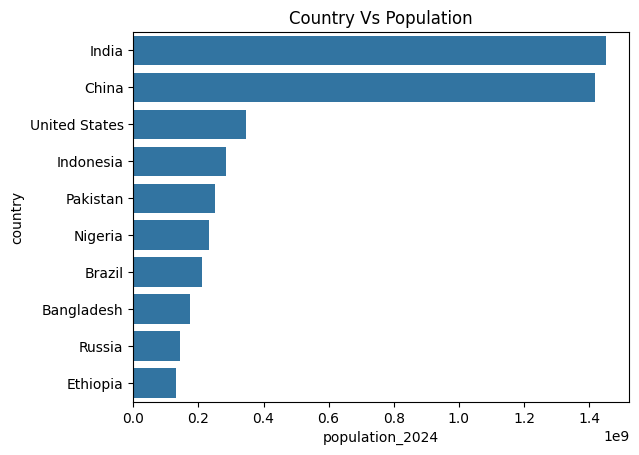

In [42]:
plt.title('Country Vs Population')
sns.barplot(
    data = df1, 
    y = df1['country'], x = df1['population_2024'], 
    order=df1['country'].head(10)
)
plt.show()

### India is most populated country in the world in 2023

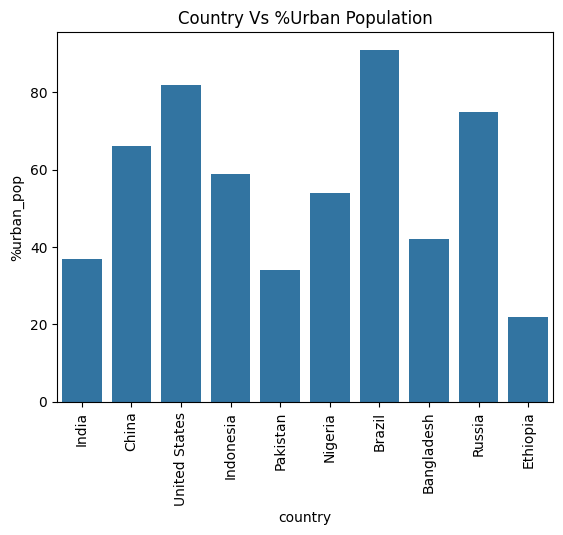

In [43]:
plt.title('Country Vs %Urban Population')
sns.barplot(
    data = df1, 
    x = df1['country'], y = df1['%urban_pop'], 
    order=df1['country'].head(10)
)
plt.xticks(rotation = 90)
plt.show()

### Urban population wise brazil in most populated

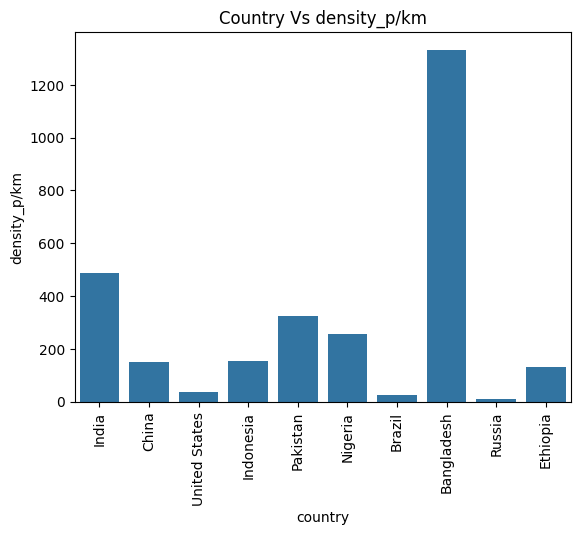

In [44]:
plt.title('Country Vs density_p/km')
sns.barplot(
    data = df1, 
    x = df1['country'], y = df1['density_p/km'], 
    order=df1['country'].head(10)
)
plt.xticks(rotation = 90)
plt.show()

### Density wise bangladesh is haveing most density p/km

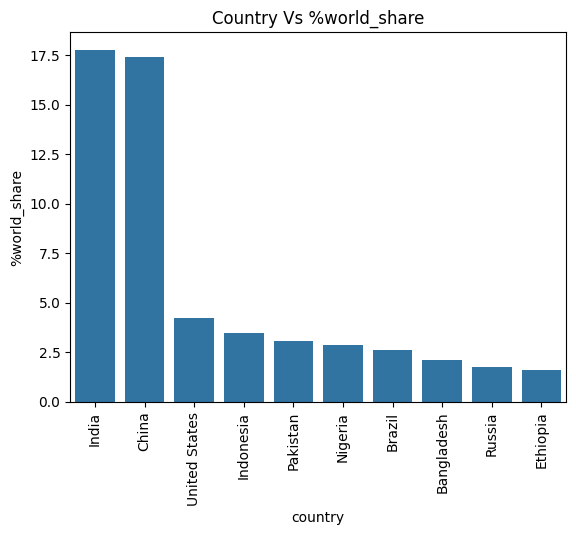

In [45]:
plt.title('Country Vs %world_share')
sns.barplot(
    data = df1, 
    x = df1['country'], y = df1['%world_share'], 
    order=df1['country'].head(10)
)
plt.xticks(rotation = 90)
plt.show()

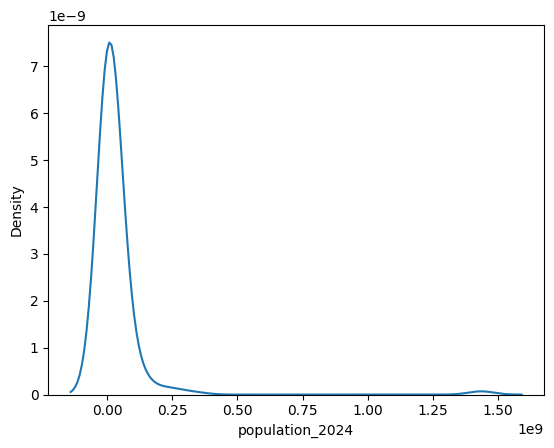

In [46]:
sns.kdeplot(df1['population_2024'])
plt.show()

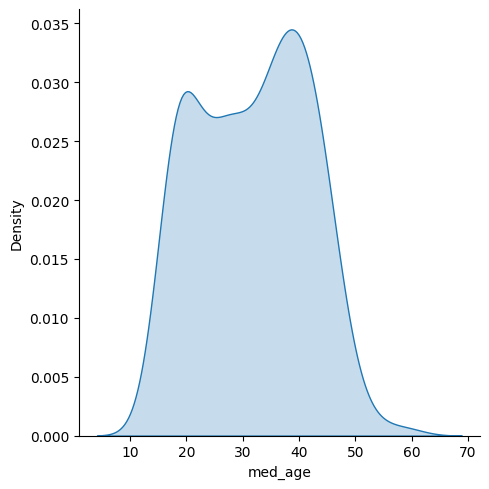

In [47]:
sns.displot(df1['med_age'],kind = 'kde', fill = True)
plt.show()

In [48]:
r1 = df1[['country', 'land_area_km2']].sort_values(by = 'land_area_km2', ascending=False).head(10)
r1

,country,land_area_km2
8,Russia,16376870
1,China,9388211
2,United States,9147420
37,Canada,9093510
6,Brazil,8358140
54,Australia,7682300
0,India,2973190
34,Argentina,2736690
63,Kazakhstan,2699700
32,Algeria,2381740


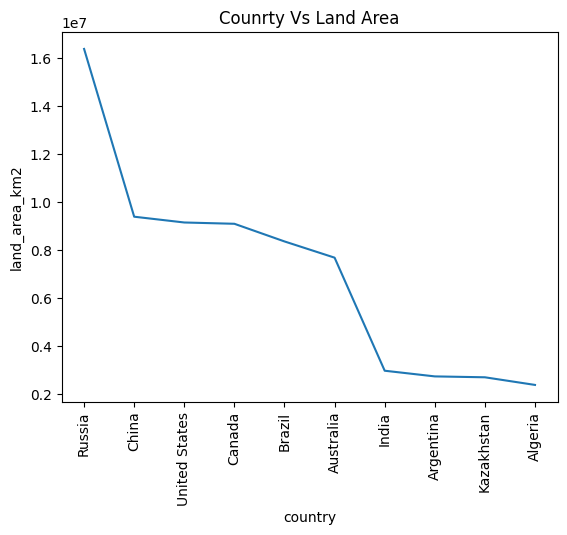

In [49]:
plt.title('Counrty Vs Land Area')
sns.lineplot(data = r1, x = r1['country'], y = r1['land_area_km2'])
plt.xticks(rotation = 90)
plt.show()

## EDA for Coronacase & World Population

In [50]:
data.head()

,country,cases,deaths,region,population_2024,%year_change,net_change,density_p/km,land_area_km2,migrats_net,fert_rate,med_age,%urban_pop,%world_share
0,United States,111820082,1219487,North America,3.454266e+08,0.57,1949236.0,38.0,9147420.0,1286132.0,1.6,38.0,82.0,4.23
1,India,45035393,533570,Asia,1.450936e+09,0.89,12866195.0,488.0,2973190.0,-630830.0,2.0,28.0,37.0,17.78
2,France,40138560,167642,Europe,6.654853e+07,0.17,109708.0,122.0,547557.0,90527.0,1.6,42.0,82.0,0.82
3,Germany,38828995,183027,Europe,8.455224e+07,0.00,4011.0,243.0,348560.0,36954.0,1.4,45.0,76.0,1.04
4,Brazil,38743918,711380,South America,2.119986e+08,0.41,857844.0,25.0,8358140.0,-225510.0,1.6,34.0,91.0,2.60


In [51]:
r2 = data[['country','cases','deaths']].sort_values(by='cases', ascending=False).head(10)
r2

,country,cases,deaths
0,United States,111820082,1219487
1,India,45035393,533570
2,France,40138560,167642
3,Germany,38828995,183027
4,Brazil,38743918,711380
5,South Korea,34571873,35934
7,Italy,26723249,196487
8,United Kingdom,24910387,232112
9,Russia,24124215,402756
10,Turkey,17232066,102174


In [52]:
r3 = data.groupby(['region'])[['population_2024']].mean().sort_values(by='population_2024').reset_index()
r3

,region,population_2024
0,Australia/Oceania,2.312183e+06
1,North America,1.563648e+07
2,Europe,1.581342e+07
3,Africa,2.612312e+07
4,South America,3.111509e+07
5,Asia,9.542144e+07


In [53]:
r4 = data.groupby(['region'])[['deaths']].mean().sort_values(by='deaths',ascending = False).reset_index()
r4

,region,deaths
0,South America,97666.571429
1,Europe,44714.808511
2,North America,43485.666667
3,Asia,30183.020408
4,Africa,4463.655172
5,Australia/Oceania,1650.750000


In [54]:
r5 = data.groupby(['region'])[['cases']].mean().sort_values(by='cases',ascending = False).reset_index()
r5

,region,cases
0,Europe,5.389457e+06
1,South America,5.014348e+06
2,Asia,3.830545e+06
3,North America,3.381773e+06
4,Australia/Oceania,7.447886e+05
5,Africa,2.217401e+05


In [55]:
data

,country,cases,deaths,region,population_2024,%year_change,net_change,density_p/km,land_area_km2,migrats_net,fert_rate,med_age,%urban_pop,%world_share
0,United States,111820082,1219487,North America,3.454266e+08,0.57,1949236.0,38.0,9147420.0,1286132.0,1.6,38.0,82.0,4.23
1,India,45035393,533570,Asia,1.450936e+09,0.89,12866195.0,488.0,2973190.0,-630830.0,2.0,28.0,37.0,17.78
2,France,40138560,167642,Europe,6.654853e+07,0.17,109708.0,122.0,547557.0,90527.0,1.6,42.0,82.0,0.82
3,Germany,38828995,183027,Europe,8.455224e+07,0.00,4011.0,243.0,348560.0,36954.0,1.4,45.0,76.0,1.04
4,Brazil,38743918,711380,South America,2.119986e+08,0.41,857844.0,25.0,8358140.0,-225510.0,1.6,34.0,91.0,2.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,Montserrat,1403,8,North America,4.389000e+03,-0.70,-31.0,44.0,100.0,-7.0,1.4,42.0,11.0,0.00
225,Niue,1059,0,Australia/Oceania,1.819000e+03,0.11,2.0,7.0,260.0,10.0,2.5,36.0,44.0,0.00
226,Tokelau,80,0,Australia/Oceania,2.506000e+03,4.55,109.0,251.0,10.0,72.0,2.6,27.0,0.0,0.00
227,Holy See,29,0,Europe,4.960000e+02,0.00,0.0,1240.0,0.0,18.0,1.0,59.0,0.0,0.00


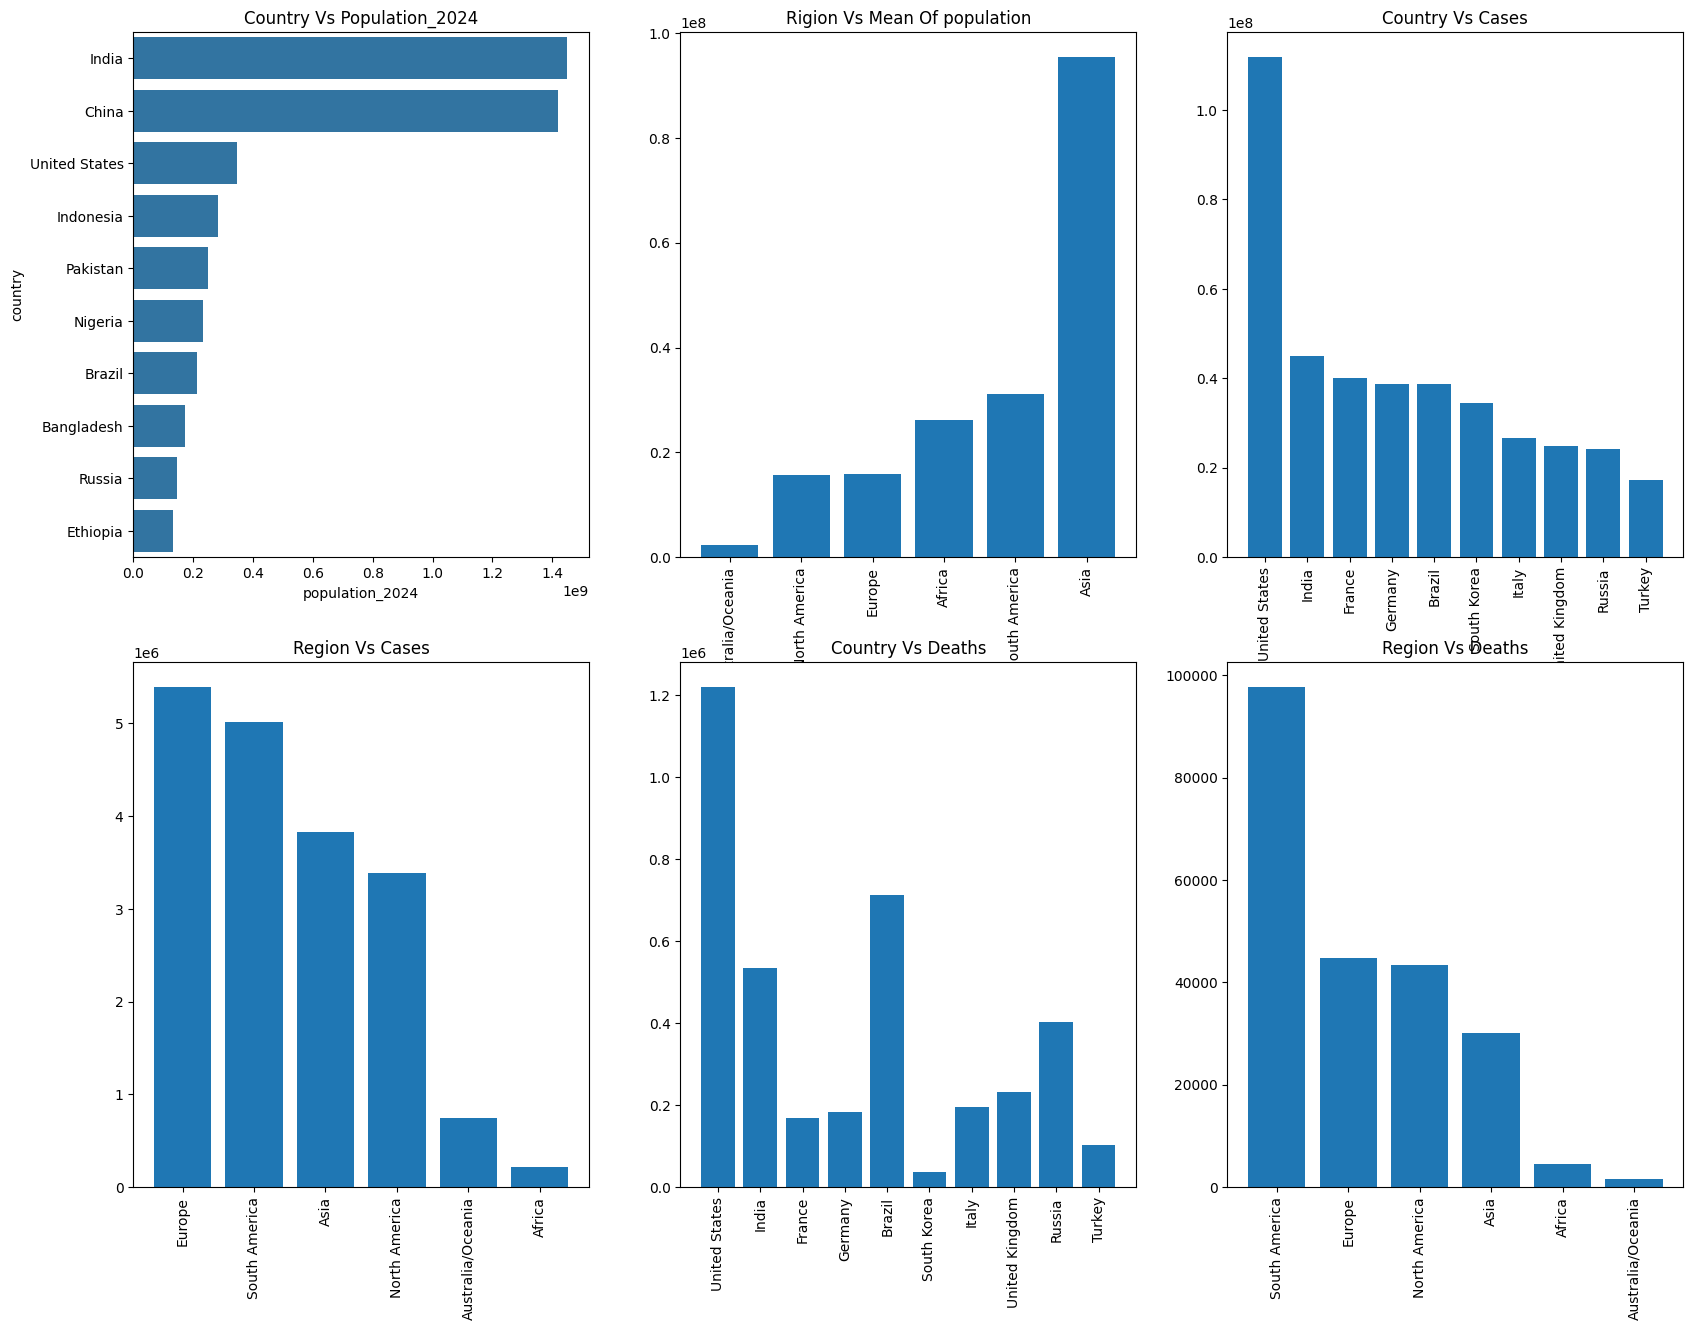

In [56]:
plt.figure(figsize = (20,15))
plt.subplot(2,3,1)
plt.title('Country Vs Population_2024')
sns.barplot(
    data = df1, 
    y = df1['country'], x = df1['population_2024'], 
    order=df1['country'].head(10))


plt.subplot(2,3,2)
plt.title('Rigion Vs Mean Of population')
plt.bar(
    r3['region'],
    r3['population_2024'])
plt.xticks(rotation = 90)


plt.subplot(2,3,3)
plt.title('Country Vs Cases')
plt.bar(
    r2['country'], 
    r2['cases'])
plt.xticks(rotation = 90)


plt.subplot(2,3,4)
plt.title('Region Vs Cases')
plt.bar(
    r5['region'],
    r5['cases'])
plt.xticks(rotation = 90)

plt.subplot(2,3,5)
plt.title('Country Vs Deaths')
plt.bar(r2['country'],
       r2['deaths'])
plt.xticks(rotation = 90)

plt.subplot(2,3,6)
plt.title('Region Vs Deaths')
plt.bar(
    r4['region'],
    r4['deaths'])
plt.xticks(rotation = 90)

plt.show()